# Unsupervised Learning
## https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,accuracy_score

In [2]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','annum_salary']
df = pd.read_csv('adult.data',names=cols)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# dimensions of the dataset
df.shape

(32561, 15)

In [5]:
# types of columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annum_salary    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# no null values found in dataset
df.isnull().any().sum()

0

In [7]:
for name in df.columns:
    print(name,':\n',df[name].unique(),'\n')

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302] 

education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving

In [8]:
# columns that have '?' as values
unknown = ['workclass','occupation','native-country']

In [9]:
# number of '?' in each column
for name in unknown:
    print(name,':',sum(df[name].str.strip() == '?'))

workclass : 1836
occupation : 1843
native-country : 583


In [10]:
# a glimpse of the dataset with '?' values
df.loc[df.workclass.str.strip() == '?',:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum_salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [11]:
# dropped '?' values from the dataset
for name in unknown:
    df.drop(df[df[name].str.strip() == '?'].index,inplace = True)

In [12]:
df.shape

(30162, 15)

In [13]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum_salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [14]:
# trimming all the extra spaces
for name in df.select_dtypes('object'):
    df[name] = df[name].str.strip()

In [15]:
nom_vars = ['workclass','marital-status','occupation','relationship','race','sex','native-country']
ord_vars = {'education': ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Prof-school','Assoc-acdm','Assoc-voc',
                          'Some-college','Bachelors','Masters','Doctorate'], 'annum_salary': ['<=50K','>50K']}

In [16]:
# converting the variables in categorical data type
for name in nom_vars:
    df[name] = df[name].astype('category')
for name,levels in ord_vars.items():
    df[name] = df[name].astype(pd.CategoricalDtype(levels,ordered=True))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  category
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  category
 4   education-num   30162 non-null  int64   
 5   marital-status  30162 non-null  category
 6   occupation      30162 non-null  category
 7   relationship    30162 non-null  category
 8   race            30162 non-null  category
 9   sex             30162 non-null  category
 10  capital-gain    30162 non-null  int64   
 11  capital-loss    30162 non-null  int64   
 12  hours-per-week  30162 non-null  int64   
 13  native-country  30162 non-null  category
 14  annum_salary    30162 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.9 MB


In [18]:
# encoding the columns
for name in df.select_dtypes('category'):
    df[name] = df[name].cat.codes

In [19]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum_salary
3289,49,2,240859,6,7,2,2,0,4,1,0,0,40,4,0
5003,28,2,161674,8,9,4,6,4,4,0,0,0,40,38,0
24664,19,2,351802,8,9,4,6,3,4,1,0,0,35,38,0
10072,18,2,201554,12,10,4,6,1,4,0,0,0,15,38,0
23975,46,2,164379,13,13,0,11,4,2,0,0,0,35,38,1


In [20]:
X = df.copy()
y = X.pop('annum_salary')

In [21]:
model_kmeans = KMeans(n_clusters=2,n_init=20,random_state=0)

In [22]:
pred = model_kmeans.fit_predict(X)

In [23]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
# data that has matched values
df.loc[y.values == pred,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum_salary
0,39,5,77516,13,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,13,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,8,9,0,5,1,4,1,0,0,40,38,0
6,49,2,160187,4,5,3,7,1,2,0,0,0,16,22,0
10,37,2,280464,12,10,2,3,0,2,1,0,0,80,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,2,116138,14,14,4,12,1,1,1,0,0,11,35,0
32554,53,2,321865,14,14,2,3,0,4,1,0,0,40,38,1
32558,58,2,151910,8,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,8,9,4,0,3,4,1,0,0,20,38,0


In [25]:
conf_mat = confusion_matrix(y,pred)
conf_mat

array([[16654,  6000],
       [ 5680,  1828]], dtype=int64)

<AxesSubplot:>

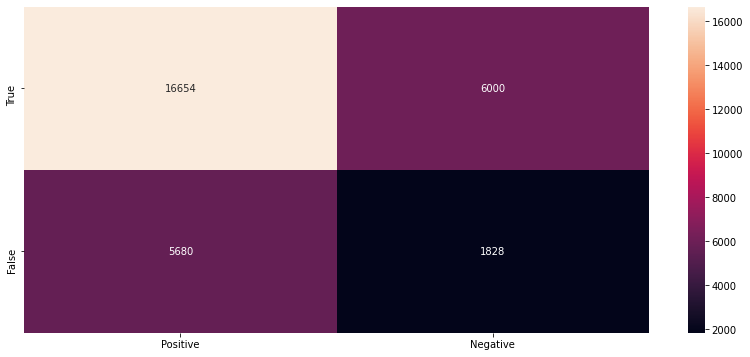

In [26]:
plt.figure(figsize=(14,6))
sns.heatmap(conf_mat,annot=True,xticklabels=('Positive','Negative'),yticklabels=('True','False'),fmt='d')

In [27]:
print(f"F1 Score: {round(f1_score(y,pred),2)}")

F1 Score: 0.24


In [28]:
print(f"Accuracy : {round(accuracy_score(y,pred)*100,2)}%")

Accuracy : 61.28%
